   # <h2 style="color:Red" position = "center"> Data Science Project Topic: Build a model to predict the types of iris flower using Logistic Regression</h2>

 # <h2 style="color:Green"> Data Science Project</h2>

Damilola Solanke


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_json('iris.json')
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.isnull().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepalLength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepalWidth,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petalLength,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petalWidth,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [7]:
df.groupby("species").mean().T

species,setosa,versicolor,virginica
sepalLength,5.006,5.936,6.588
sepalWidth,3.428,2.770,2.974
petalLength,1.462,4.260,5.552
petalWidth,0.246,1.326,2.026


# Let's Visualize Our Data

Using Boxplot first

<AxesSubplot:xlabel='species', ylabel='petalLength'>

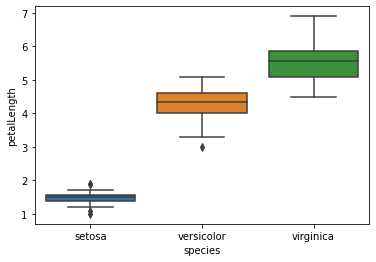

In [8]:
sns.boxplot(x="species", y="petalLength", data = df) 

<AxesSubplot:xlabel='species', ylabel='petalWidth'>

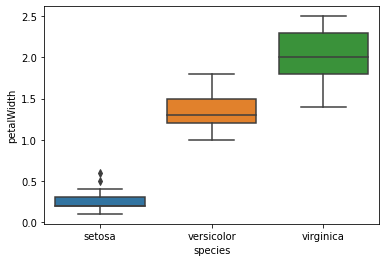

In [9]:
sns.boxplot(x="species", y="petalWidth", data = df)

<AxesSubplot:xlabel='species', ylabel='sepalLength'>

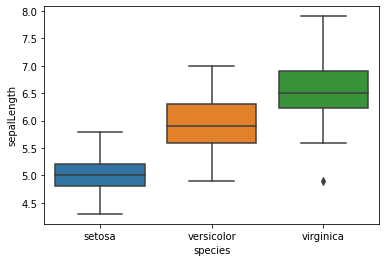

In [10]:
sns.boxplot(x="species", y="sepalLength", data = df)

<AxesSubplot:xlabel='species', ylabel='sepalWidth'>

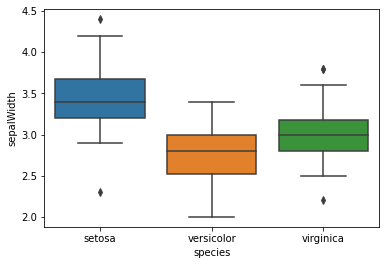

In [11]:
sns.boxplot(x="species", y="sepalWidth", data = df)

We Can also Use Pairplot to show the difference amongst the three Iris species

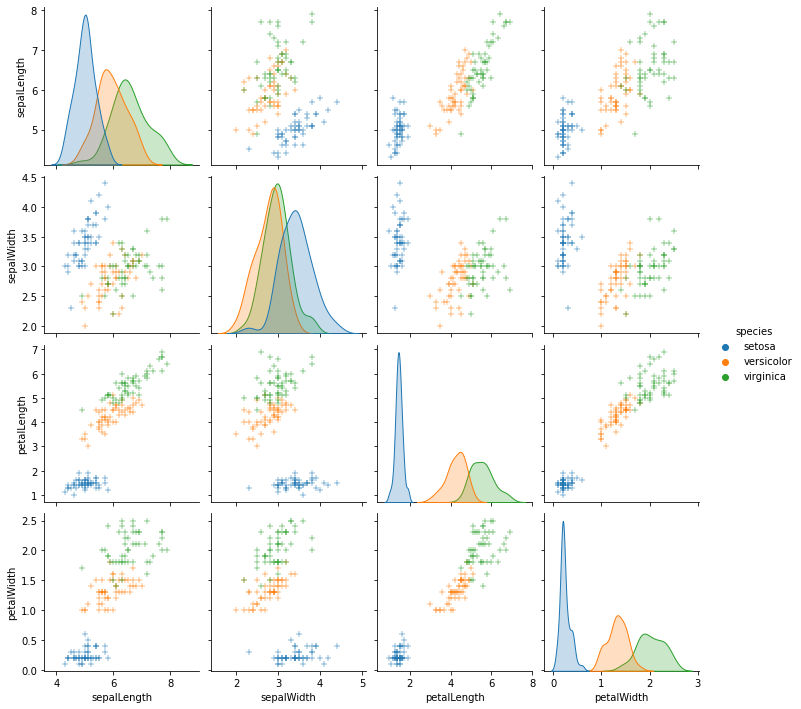

In [12]:
sns.pairplot(df, hue='species', markers='+')
plt.show()


Violin plot is another type of visualization

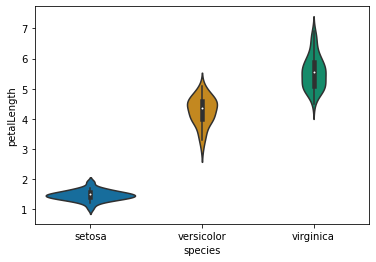

In [13]:
sns.violinplot(x="species", y="petalLength", data=df, size=5, palette = 'colorblind')
plt.show()

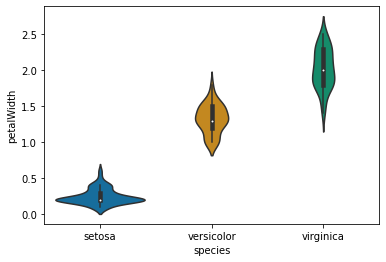

In [14]:
sns.violinplot(x="species", y="petalWidth", data=df, size=5, palette = 'colorblind')
plt.show()


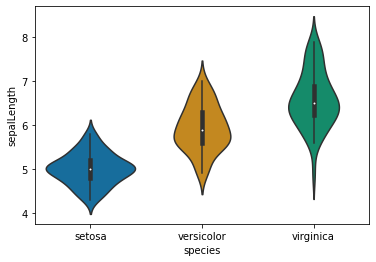

In [15]:
sns.violinplot(x="species", y="sepalLength", data=df, size=5, palette = 'colorblind')
plt.show()


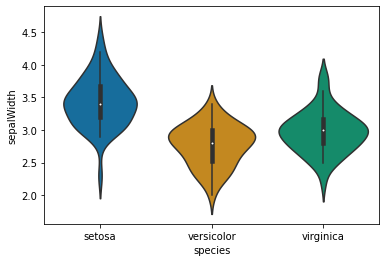

In [16]:
sns.violinplot(x="species", y="sepalWidth", data=df, size=5, palette = 'colorblind')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df.drop(['species'], axis = 1)
x

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y = df["species"]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

In [21]:
X_train

,sepalLength,sepalWidth,petalLength,petalWidth
58,6.6,2.9,4.6,1.3
97,6.2,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
114,5.8,2.8,5.1,2.4
146,6.3,2.5,5.0,1.9
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [23]:
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_predicted = model.predict(X_test)

In [25]:
model.predict_proba(X_test)

array([[3.57936376e-03, 8.83699690e-01, 1.12720946e-01],
       [1.08393354e-04, 1.44425425e-01, 8.55466182e-01],
       [9.72037134e-01, 2.79627797e-02, 8.59209647e-08],
       [5.72456888e-03, 7.83928035e-01, 2.10347396e-01],
       [9.74356842e-01, 2.56430703e-02, 8.75576590e-08],
       [6.35541372e-02, 9.24612138e-01, 1.18337247e-02],
       [9.32542417e-04, 5.54528136e-01, 4.44539322e-01],
       [2.04387848e-02, 9.48835650e-01, 3.07255648e-02],
       [9.69354226e-01, 3.06456485e-02, 1.25512321e-07],
       [8.52098725e-03, 8.13621912e-01, 1.77857101e-01],
       [1.01047294e-02, 7.24352654e-01, 2.65542617e-01],
       [3.28025452e-04, 1.64168973e-01, 8.35503001e-01],
       [1.82281623e-02, 9.15873414e-01, 6.58984233e-02],
       [9.66428812e-01, 3.35710546e-02, 1.33554931e-07],
       [9.80560839e-01, 1.94390692e-02, 9.15159866e-08],
       [3.57497194e-05, 7.68150809e-02, 9.23149169e-01],
       [1.15315713e-02, 7.47716715e-01, 2.40751714e-01],
       [9.82582614e-01, 1.74173

In [26]:
from sklearn import metrics

In [27]:
metrics.accuracy_score(y_test,y_predicted)

1.0

In [28]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_predicted,y_test))

accuracy is 1.0


To predict We inputed our random data 
sepalLength	sepalWidth	petalLength	petalWidth

In [29]:
model.predict([[6.2, 2.8, 4.8, 1.8]])

array(['virginica'], dtype=object)

In [30]:
model.predict([[2.8, 3.4, 1.4, 0.2]])

array(['setosa'], dtype=object)

In [31]:
model.predict([[5.2, 2.8, 3.8, 1.8]])

array(['versicolor'], dtype=object)